# Pizza delivery company
**Problem**: By evening, the delivery speed drops due to the fact that the couriers go home after working hours, while the number of orders only grows. This leads to the fact that at the time of the shift change our delivery is very low in efficiency.

A new algorithm was devised that allows couriers to schedule their last orders before the end of the workday so that their delivery route matches their route home. That is, so that the couriers deliver their last orders of the day as if they were "on their way" home.

There are two equal groups of couriers. Some couriers use the old algorithm without the "on the way" option, others see this option in their application and can select it.

The **task** is to analyze the data from the experiment and help the business decide whether to roll out the new feature to all couriers.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(12,6)}, style='whitegrid')

In [2]:
# Loading and reading dataset
df_delivery = pd.read_csv('data\delivery.csv')
df_delivery

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


In [3]:
# Investigating dataset information
def overview(df):
    print(" DATA INFO ".center(125,'-'))
    print(df.info())
    
    print(" SHAPE OF DATASET ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    
    print(" DATA TYPES ".center(125,'-'))
    print(df.dtypes)
    
    print(" STATISTICS OF DATA ".center(125,'-'))
    print(df.describe(include="all"))
    
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending = False))
    
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())

overview(df_delivery)

--------------------------------------------------------- DATA INFO ---------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          20196 non-null  int64  
 1   delivery_time     20196 non-null  float64
 2   district          20196 non-null  object 
 3   experiment_group  20196 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 631.3+ KB
None
------------------------------------------------------ SHAPE OF DATASET -----------------------------------------------------
Rows:20196
Columns:4
--------------------------------------------------------- DATA TYPES --------------------------------------------------------
order_id              int64
delivery_time       float64
district             object
experiment_group     object
dtype: object
----------------

REMARK: There are no missing values or duplicates in the dataset. 

Data description:

    order_id - order
    id delivery_time - delivery time in minutes
    district - delivery area 
    experiment_group - experimental group

Hypotheses were formulated to be tested in this experiment:

 -  *The null hypothesis* (H0): There is no difference between the mean delivery time in the test and contralateral groups.
 -  *Alternative hypothesis* (H1): There is a difference between the mean delivery time in the test and control groups.

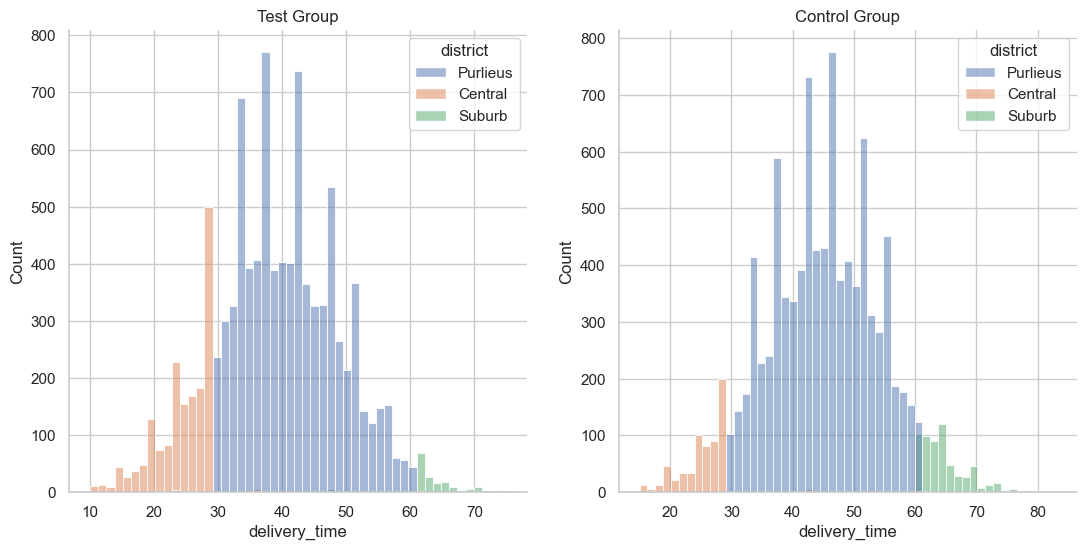

In [4]:
# Group distribution charts
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
sns.histplot(ax=axes[0],
             data=df_delivery.query('experiment_group == "test"'), 
             x='delivery_time', 
             hue='district')
axes[0].set_title('Test Group')
sns.histplot(ax=axes[1], 
             data=df_delivery.query('experiment_group == "control"'), 
             x='delivery_time', 
             hue='district')
axes[1].set_title('Control Group')
sns.despine()

In [5]:
# Number of observations in test and control groups
counter = df_delivery.groupby('experiment_group').order_id.count()
counter

experiment_group
control    10092
test       10104
Name: order_id, dtype: int64

In [6]:
# Checking for normality of distributions using the Shapiro-Wilk test
ss.shapiro(df_delivery\
               .query('experiment_group == "test"') \
               .delivery_time \
               .sample(1000, random_state=17)
          )

ShapiroResult(statistic=0.9975473880767822, pvalue=0.14001426100730896)

In [7]:
ss.shapiro(df_delivery\
               .query('experiment_group == "control"') \
               .delivery_time \
               .sample(1000, random_state=17)
          )

ShapiroResult(statistic=0.9974724054336548, pvalue=0.12408281117677689)

The distributions are normal

In [8]:
# Comparison of group averages using Student's t-test
ss.ttest_ind(df_delivery.query('experiment_group == "control"').delivery_time,
             df_delivery.query('experiment_group == "test"').delivery_time,
            )

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

The value of statistic (t statistic) is 43.03582663183714. A large value of t statistic indicates a significant difference between the mean values of the samples.

The pvalue is 0.0, which means there is a very low probability of getting such a difference between groups by chance. 

Thus, the conclusion is that the mean values of delivery times between the "control" and "test" groups are statistically significantly different, and the difference has a high degree of confidence (p-level is close to zero).

In [9]:
# Estimation of change in speed of delivery time across groups
control_mean = df_delivery.query('experiment_group == "control"').delivery_time.mean()
test_mean = df_delivery.query('experiment_group == "test"').delivery_time.mean()
percent = pd.Series([control_mean, test_mean]).pct_change().iloc[-1] * 100
print(f'Speed of delivery\nMean in control group:\t{control_mean:.2f}')
print(f'Mean in test group:\t{test_mean:.2f}')
print(f'Percentage of change:\t{percent:.2f}%')

Speed of delivery
Mean in control group:	45.07
Mean in test group:	39.05
Percentage of change:	-13.35%


## Results

    Based on the provided output and context, here are the conclusions from the study on the change in delivery speed with the addition of the "on the way" functionality:

Speed of Delivery:

- The mean delivery time in the control group (without the "on the way" functionality) is 45.07 minutes.
- The mean delivery time in the test group (with the "on the way" functionality) is 39.05 minutes.

Percentage of Change:

- The percentage change in delivery time between the control and test groups is -13.35%.

Conclusion:

    The negative percentage of change (-13.35%) suggests that the addition of the "on the way" functionality has resulted in a statistically significant improvement in the average delivery time. The negative value indicates a decrease in the average delivery time in the test group compared to the control group.
    
Decision:

    Based on the observed statistically significant improvement in delivery speed with the addition of the "on the way" functionality, it is recommended to roll out this algorithm to everyone. Implementing the "on the way" feature has resulted in a measurable improvement in delivery time, making it a valuable addition for all users or customers.
    
    It's worth noting that additional statistical analysis, such as hypothesis testing and confidence intervals, could provide more robust conclusions about the significance of the observed change. Also, considering factors like user feedback and operational aspects before the final decision is crucial.
